In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [3]:
path = Path('kaggle_chest_xray')

In [4]:
fns = get_image_files(path)
fns

(#300) [Path('kaggle_chest_xray/normal/IM-0329-0001.jpeg'),Path('kaggle_chest_xray/normal/IM-0327-0001.jpeg'),Path('kaggle_chest_xray/normal/IM-0326-0001.jpeg'),Path('kaggle_chest_xray/normal/IM-0330-0001.jpeg'),Path('kaggle_chest_xray/normal/IM-0331-0001.jpeg'),Path('kaggle_chest_xray/normal/IM-0325-0001.jpeg'),Path('kaggle_chest_xray/normal/IM-0324-0001.jpeg'),Path('kaggle_chest_xray/normal/IM-0319-0001.jpeg'),Path('kaggle_chest_xray/normal/IM-0318-0001.jpeg'),Path('kaggle_chest_xray/normal/IM-0320-0001.jpeg')...]

In [5]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [6]:
dls = bears.dataloaders(path)

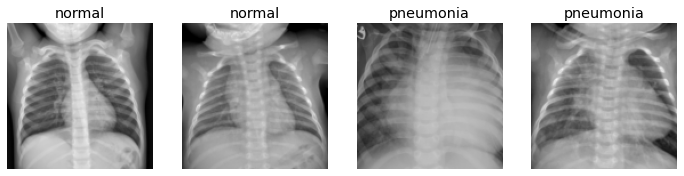

In [7]:
dls.valid.show_batch(max_n=4, nrows=1)

In [8]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [10]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.048289,1.557991,0.483333,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.551607,0.803532,0.333333,00:21
1,0.526076,0.418217,0.133333,00:21
2,0.455590,0.233982,0.050000,00:21
3,0.382252,0.168282,0.066667,00:21
4,0.335537,0.151803,0.033333,00:21
5,0.301929,0.161634,0.050000,00:21
6,0.276689,0.207451,0.100000,00:21
7,0.263996,0.249731,0.100000,00:21
8,0.246426,0.268999,0.100000,00:21
9,0.230073,0.269850,0.083333,00:21


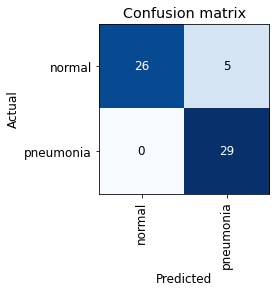

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [15]:
learn.export(fname='kaggle_chest_xray.pkl')

In [16]:
path = Path()
path.ls(file_exts='.pkl')

(#2) [Path('export.pkl'),Path('kaggle_chest_xray.pkl')]

In [17]:
learn_inf = load_learner(path/'kaggle_chest_xray.pkl')

In [20]:
learn_inf.predict('kaggle_chest_xray/normal/IM-0318-0001.jpeg')

('normal', tensor(0), tensor([9.9964e-01, 3.5756e-04]))

In [19]:
learn_inf.dls.vocab

(#2) ['normal','pneumonia']

In [26]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [27]:
img = PILImage.create(btn_upload.data[-1])

In [28]:
out_pl = widgets.Output()

In [29]:
pred,pred_idx,probs = learn_inf.predict(img)

In [31]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [33]:
btn_run = widgets.Button(description='Classify')

In [34]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [37]:
VBox([widgets.Label('Pneumonia detector : Select your xray!'), btn_upload, btn_run, out_pl, lbl_pred])